## Problem Statement - 
Implement two neural networks (with 3 layers and 5 layers) regression to predict housing prices and discuss accuracy of one over other.

__NOTE__ : There are some tableau visualizations in the code. So hover over the viz to get more insights of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train.csv')   # loading the train data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('test.csv')  # loading the test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("Train Shape: ", df_train.shape)
df_train.describe()

Train Shape:  (1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print("Test shape: ",df_test.shape)
df_test.describe()

Test shape:  (1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

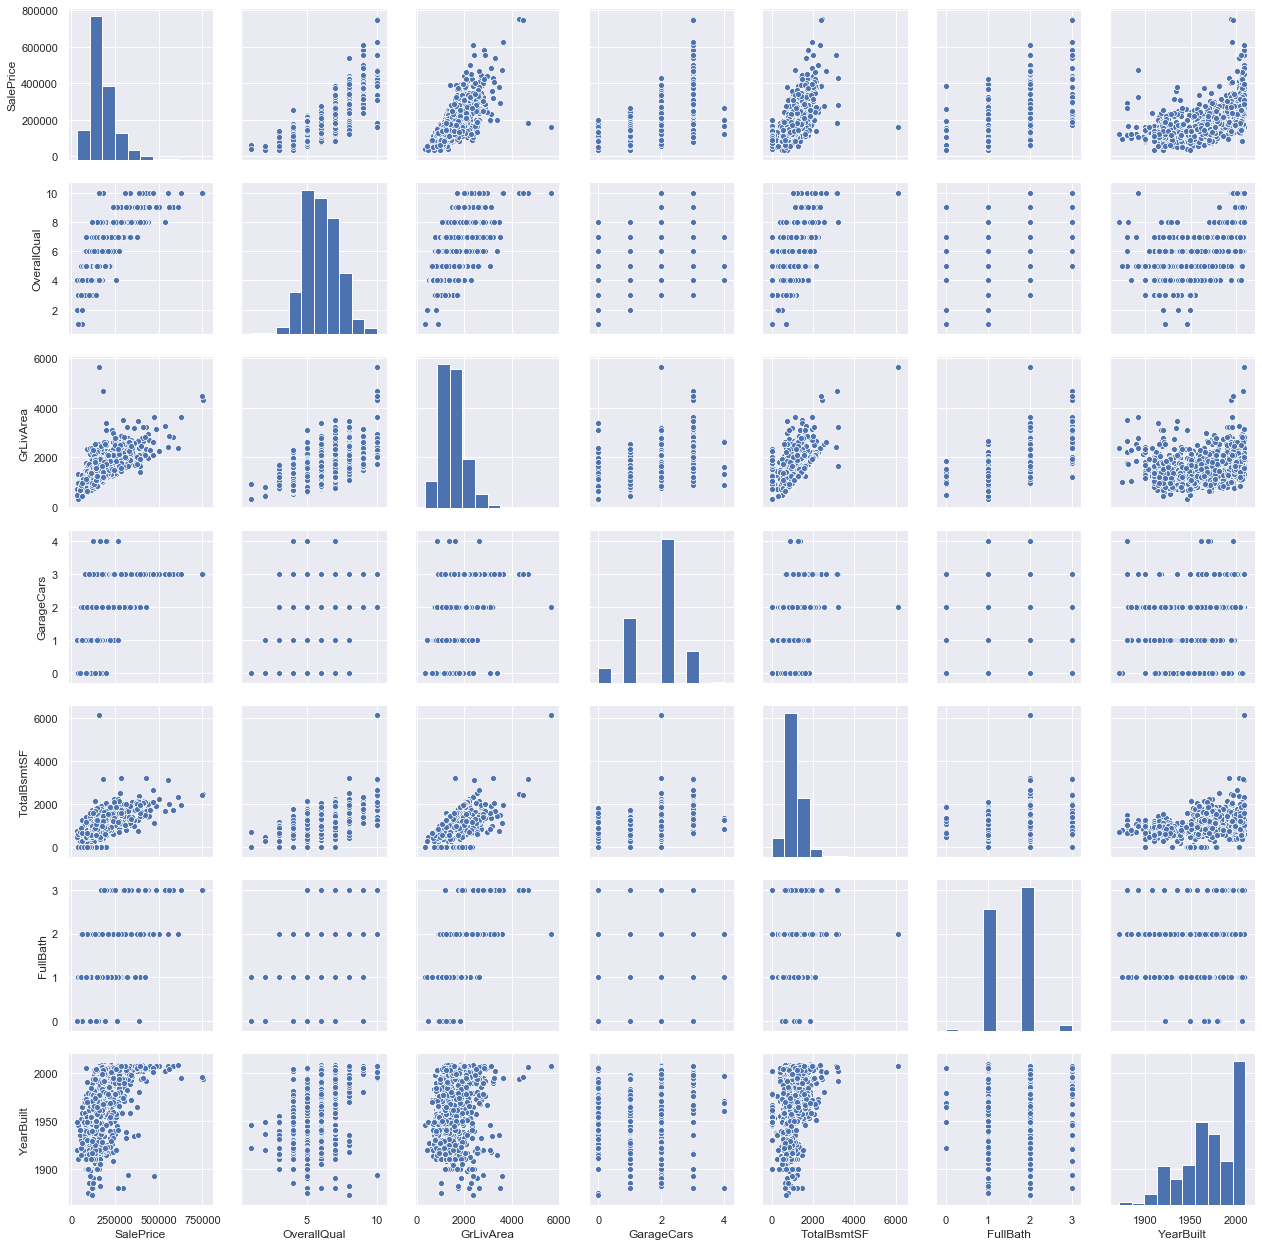

In [7]:
import seaborn as sns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# TREATING OUTLIERS

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1564577759762' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564577759762');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1564577982635' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet7&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet7' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet7&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564577982635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations:__ 
1. As the GrLiveArea increases the saleprice also increases
2. As the TotalBsmtSF increases the saleprice increases.
3. But there are two points in the dataset with Id = 1299 and 524 which do not follow this trend

In [10]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [11]:
train_ID = df_train['Id']
test_ID = df_test['Id']

#delete the id column from datasets
del df_train['Id']
del df_test['Id']

In [12]:
print(df_train.shape)
print(df_test.shape)

(1458, 80)
(1459, 79)


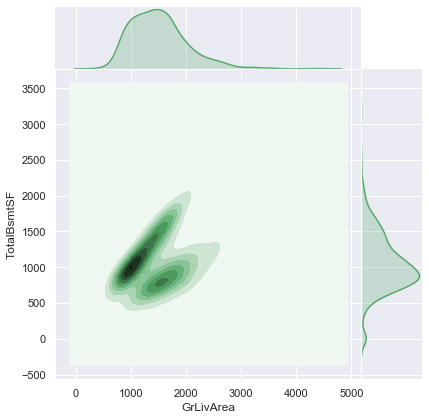

In [13]:
 g = sns.jointplot("GrLivArea", "TotalBsmtSF", data=df_train,
                  kind="kde", space=0, color="g")

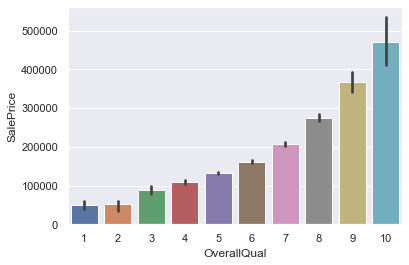

In [14]:
sns.barplot(df_train.OverallQual,df_train.SalePrice)

As the Overall Quality of house increases its saleprice also increases.

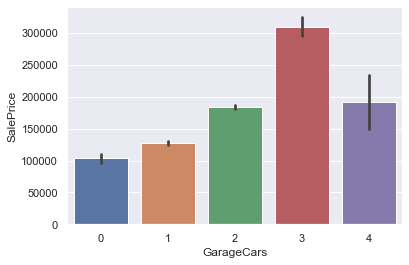

In [15]:
sns.barplot(df_train.GarageCars,df_train.SalePrice)

Text(0.5, 1.0, 'Houses Sold per Year')

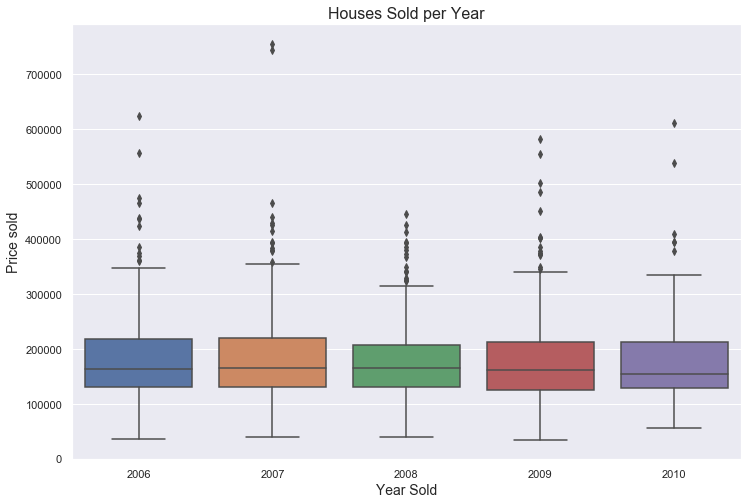

In [16]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=df_train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

__Observations__: 
The sale price of the most of the houses sold each year is in between 12,000 to 21,000.

# DATA NORMALIZATION


 mu = 180932.92 and sigma = 79467.79



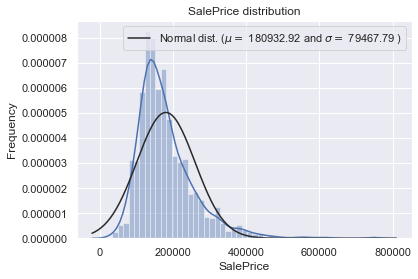

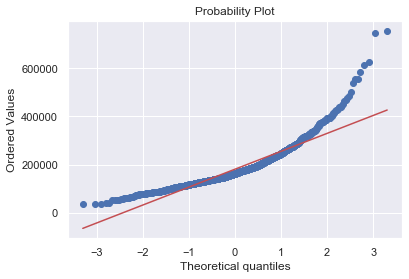

In [17]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df_train['SalePrice'] , fit=norm);


(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [18]:
%%HTML
<div class='tableauPlaceholder' id='viz1564580491758' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564580491758');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations__:
1. The number of houses built in 2006 was highest with total of 67 houses built that year.
2. In the years 1920,1976,2002,2003,2007,2008 significant number of houses were built.

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1564581355727' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet9' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564581355727');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations__:
Most number of houses were built in the neighborhood 'NAmes' and the least number of houses were built in the 'Blueste' neighborhood.

In [20]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    

In [21]:
y = df_train['SalePrice'].values
df = df_train

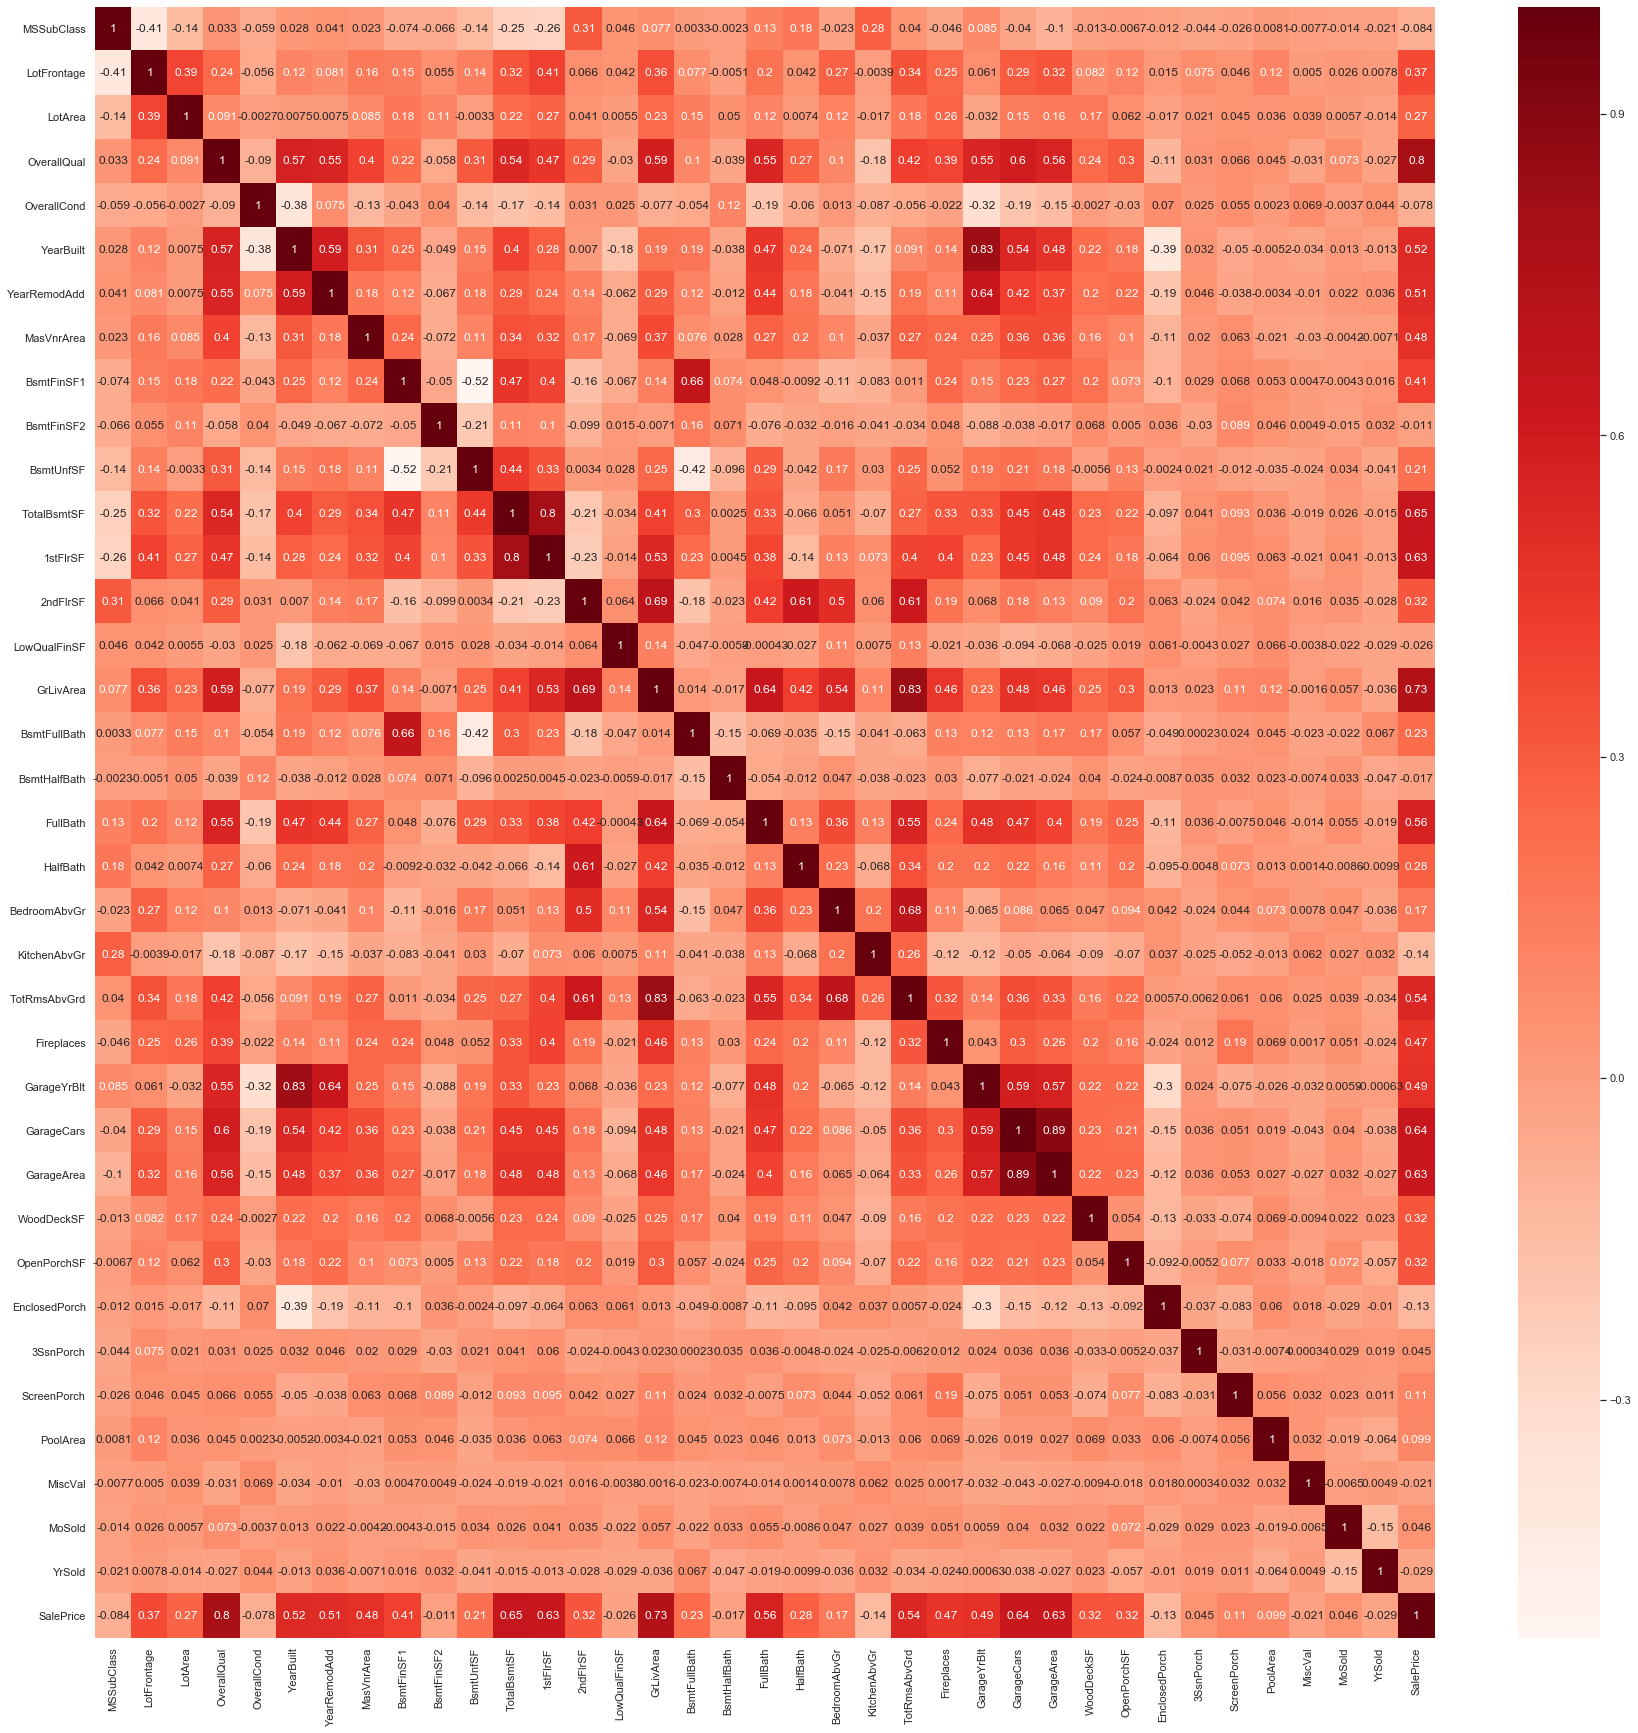

In [22]:
# correlation matrix

plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

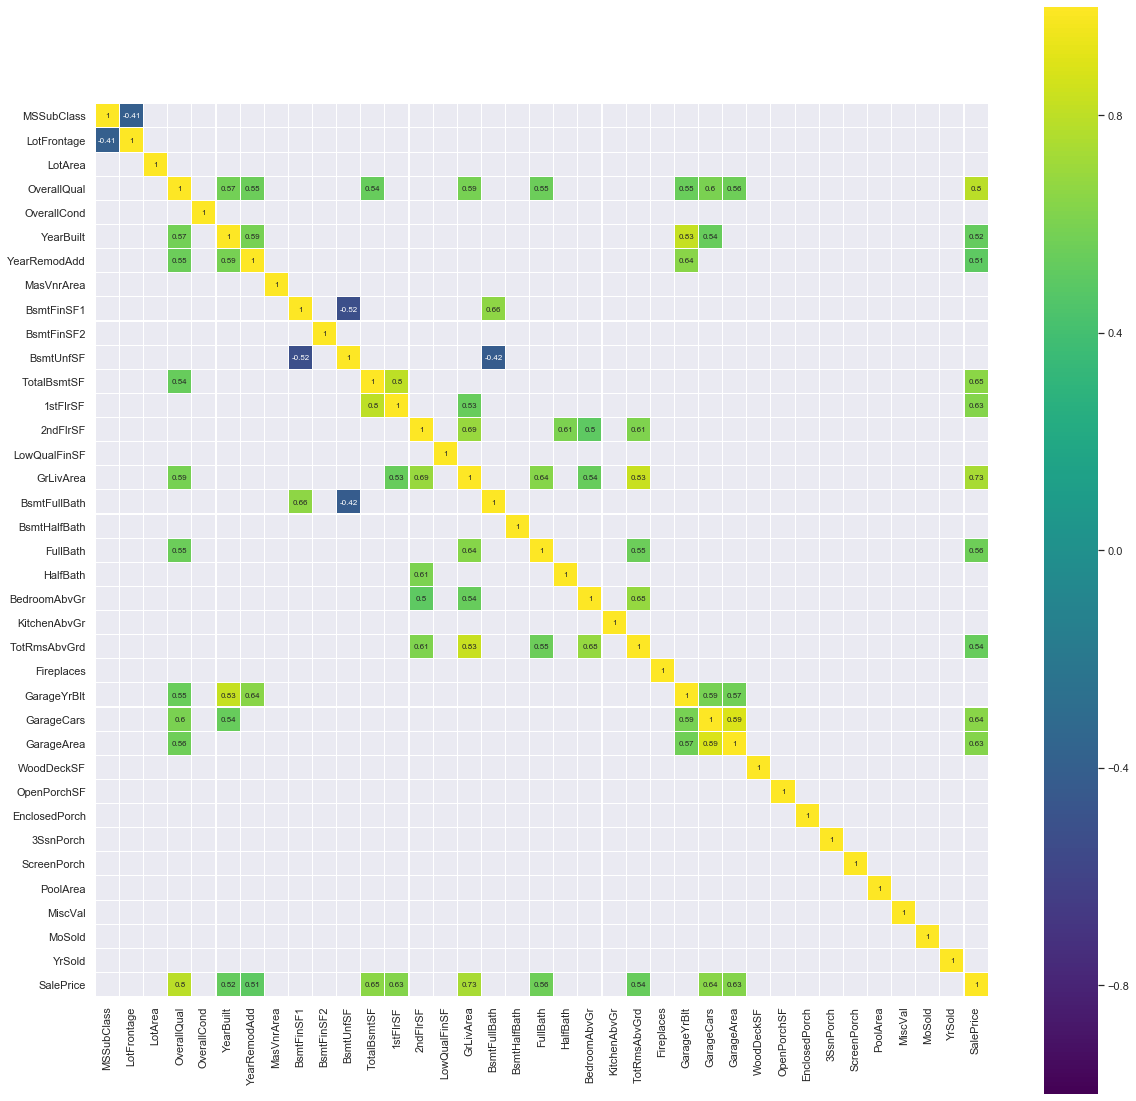

In [23]:
# Most corelated features

import seaborn as sns

corr = df.corr() 
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

The correlation coefficient has values between -1 to 1
1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies stronger negative correlation

# Dealing with missing values

Populating the interactive namespace from numpy and matplotlib


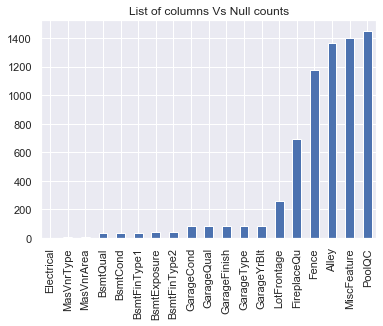

In [24]:
%pylab inline
null_columns = df.isnull().sum()  # to find the number of null values in each column
null_columns = null_columns[null_columns.values > 0]
null_columns.sort_values(inplace=True)
plt.title('List of columns Vs Null counts')
null_columns.plot.bar()

In [25]:
limitPer = 0.4*(len(df))
df = df.dropna(thresh=limitPer,axis=1)   #dropping alll those columns which have more than 40% null values in them
print(df.shape)
df.columns

(1458, 76)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [26]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
FireplaceQu,47.325103
LotFrontage,17.764060
GarageCond,5.555556
GarageQual,5.555556
GarageFinish,5.555556
GarageYrBlt,5.555556
GarageType,5.555556
BsmtFinType2,2.606310
BsmtExposure,2.606310
BsmtFinType1,2.537723


In [27]:
df.drop(columns={'FireplaceQu'}, inplace=True)

In [28]:
df['LotFrontage'] = df.fillna(df['LotFrontage'].median())   # replacing nan values with median of the column

In [29]:
#replacing null values with 'None' as there may be no garage in the house
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [30]:
df['MSZoning'].value_counts()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

The most occuring value in MSZoning is RL, so we replace all the null values by RL

In [31]:
# imputiong with the most occuring value ( mode )

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

#as there is only one missing value, we will impute it with the most occurring value
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])


df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [32]:
#NaN means there is no basement, so filling the null values with 'None'
for col in('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    df[col]=df.fillna('None')

In [33]:
for col in ('BsmtFinSF1','TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtUnfSF'):   # some houses have no basements so filling it with 0
    df[col] = df[col].fillna(0)

In [34]:
#no masonry veneer for some houses
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [35]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)  # There is no garage in some houses so replacing it with 0

In [36]:
df = df.drop(['Utilities'], axis=1)  # This column have mostly same value so droping this Utilities column

In [37]:
#NA for 'Functional' variable means typical (as per data description)
df["Functional"] = df["Functional"].fillna("Typ")

In [38]:
for col in ('GarageArea', 'GarageCars'):   # there is no garage so filling missing values by 0
    df[col] = df[col].fillna(0)

In [39]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio


No more missing values are there in the dataset, so now we can proceed further.

In [40]:
df['Street'].value_counts()

Pave    1452
Grvl       6
Name: Street, dtype: int64

In [41]:
df.drop(columns={'Street'}, inplace=True) # We can drop the columns Street because almost all the values are same

In [42]:
print('Shape of df : ',df.shape)

Shape of df :  (1458, 73)


In [43]:
# Finding the number of categorical columns and numerical columns in the data set

cat_col = []
num_col = []

cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(exclude=['object'])

for col in cat.columns:
    cat_col.append(col)
    
for col in num.columns:
    num_col.append(col)

In [44]:
print('No. of categorical columns: ', len(cat_col))
print('No. of numerical columns: ', len(num_col))

No. of categorical columns:  37
No. of numerical columns:  36


In [45]:
df = df[num_col + cat_col]

In [46]:
from sklearn.preprocessing import LabelEncoder

def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

    
print('There were {} columns before encoding categorical features'.format(df.shape[1]))
df = oneHotEncode(df, cat_col)
print('There are {} columns after encoding categorical features'.format(df.shape[1]))

There were 73 columns before encoding categorical features
There are 335 columns after encoding categorical features


In [47]:
df.drop(columns={'SalePrice'},axis=1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,10382,7,6,1973,1973,240.0,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,0.0,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

In [49]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [50]:
maxprice = y.max()
y_train = y_train/maxprice
y_test = y_test/maxprice

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1166, 335)
(1166,)
(292, 335)
(292,)


# Neural Network with 5 layers

In [52]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import layers

Using TensorFlow backend.


In [53]:
seed = 7
np.random.seed(seed)

def build_regressor():
    
    model = Sequential()    

    # input lauer
    model.add(Dense(256, kernel_initializer='normal', input_dim=335, activation='relu'))
    
    # hiddden layers
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    
    # output layer
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    model.compile(
        loss = 'mse',
        optimizer = 'adam',
        metrics = ['mse','mae','mape'])

    model.summary()
    
    return model

In [54]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100, verbose=1)

In [55]:
model.fit(x_train, y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               86016     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total para

1166/1166 [==============================] - 0s 88us/step - loss: 1.8000e-04 - mean_squared_error: 1.8000e-04 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 4.2204
Epoch 37/100
1166/1166 [==============================] - 0s 87us/step - loss: 2.5339e-04 - mean_squared_error: 2.5339e-04 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 4.8742
Epoch 38/100
1166/1166 [==============================] - 0s 90us/step - loss: 1.4913e-04 - mean_squared_error: 1.4913e-04 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 3.6999
Epoch 39/100
1166/1166 [==============================] - 0s 86us/step - loss: 1.3892e-04 - mean_squared_error: 1.3892e-04 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 3.4343
Epoch 40/100
1166/1166 [==============================] - 0s 87us/step - loss: 1.7227e-04 - mean_squared_error: 1.7227e-04 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 3.9475
Epoch 41/100
1166/1166 [===================

1166/1166 [==============================] - 0s 107us/step - loss: 1.8083e-04 - mean_squared_error: 1.8083e-04 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 3.8323
Epoch 79/100
1166/1166 [==============================] - 0s 99us/step - loss: 1.1998e-04 - mean_squared_error: 1.1998e-04 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 3.2143
Epoch 80/100
1166/1166 [==============================] - 0s 91us/step - loss: 1.3586e-04 - mean_squared_error: 1.3586e-04 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 3.1809
Epoch 81/100
1166/1166 [==============================] - 0s 91us/step - loss: 7.6091e-05 - mean_squared_error: 7.6091e-05 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 2.6298
Epoch 82/100
1166/1166 [==============================] - 0s 88us/step - loss: 9.6212e-05 - mean_squared_error: 9.6212e-05 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 2.8110
Epoch 83/100
1166/1166 [==================

In [56]:
pred = model.predict(x_test)

292/292 [==============================] - 0s 157us/step


In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
print('Mean Squared error: ',mse)

Mean Squared error:  0.0010490852981592843


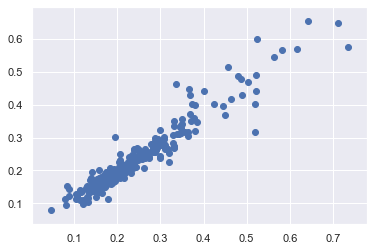

In [58]:
plt.scatter(y_test,pred)

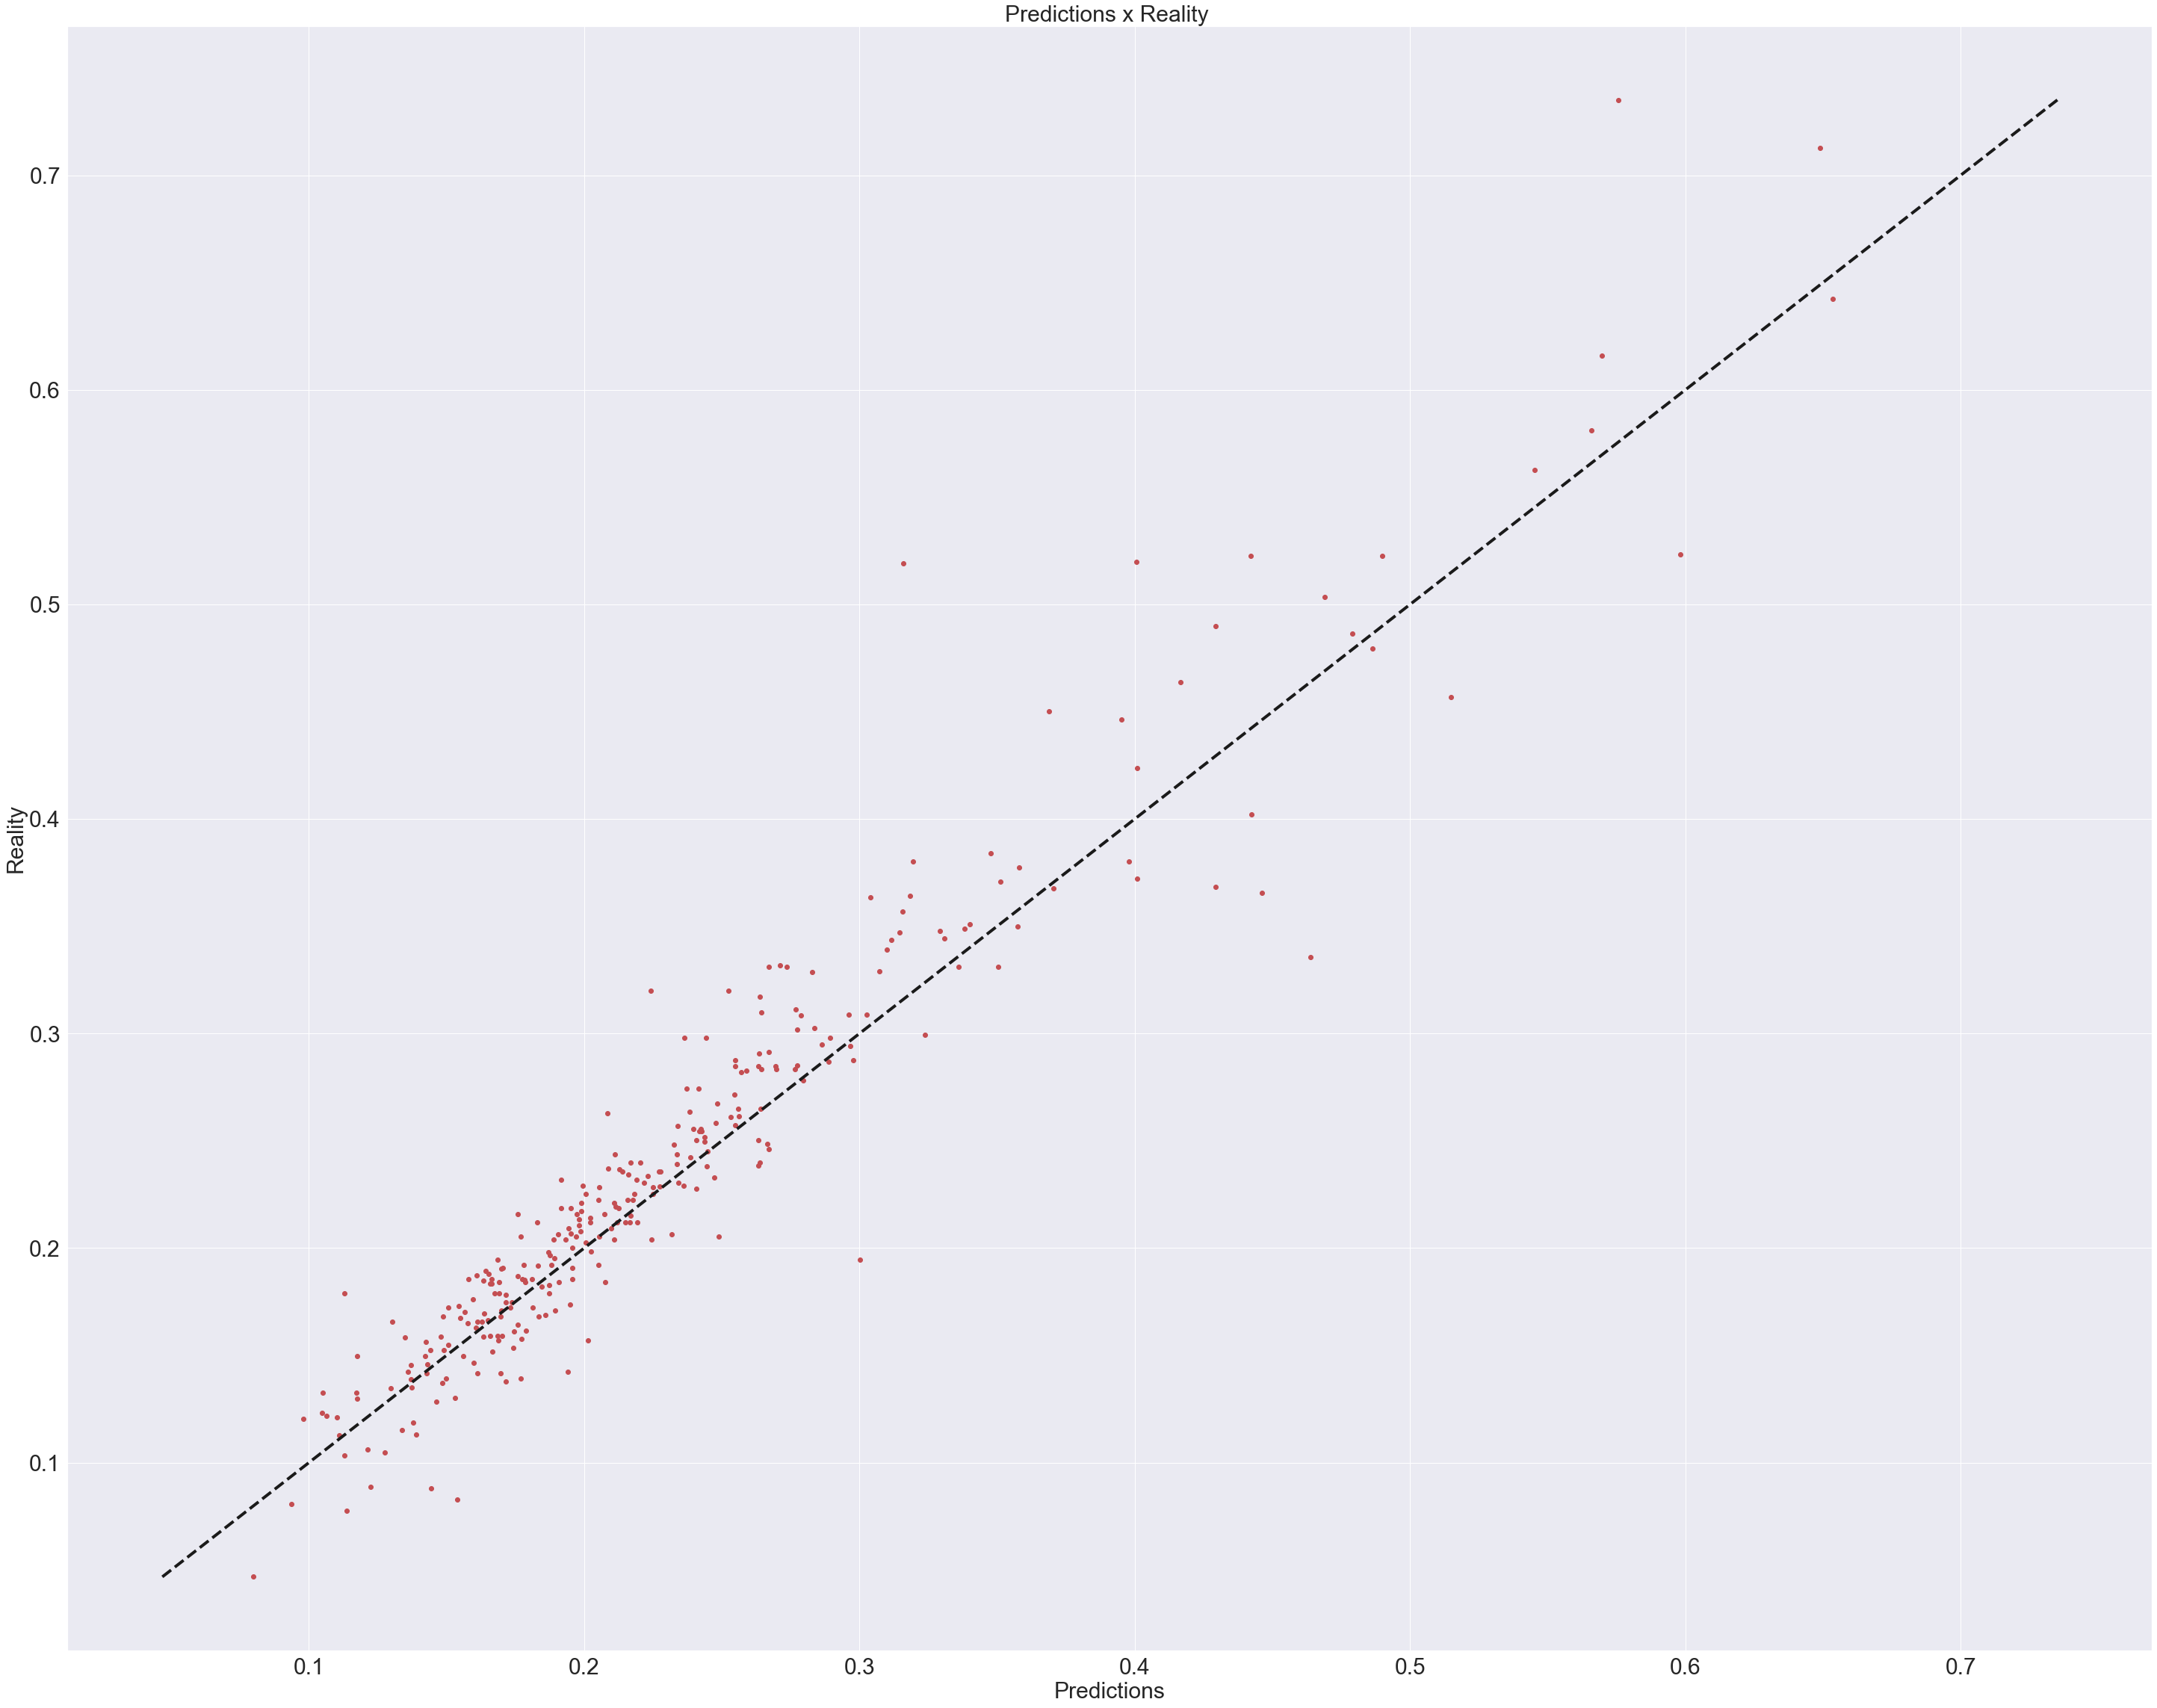

In [59]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(pred, y_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality ', fontsize = 30)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


# Neural Network with 3 layers

In [60]:
seed = 7
np.random.seed(seed)

def build_regressor():
    
    model = Sequential()

    # input layer
    model.add(Dense(150, kernel_initializer='normal', input_dim=335, activation='relu'))
    model.add(Dropout(0.05))
    
    # hidden layer
    model.add(Dense(75, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.05))
    
    # output layer
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    model.compile(
        loss = 'mean_squared_error',
        optimizer = 'adam',
        metrics = ['mse', 'mae', 'mape'])

    model.summary()
    
    return model

In [61]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)

In [62]:
model.fit(x_train, y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               50400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 75)                11325     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 76        
Total params: 61,801
Trainable params: 61,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1166/1166 [==============================] - 0s 343us/step - loss: 0.0125 - mean_squared_error: 0.0125 - mean_absolute_error: 

1166/1166 [==============================] - 0s 68us/step - loss: 3.1557e-04 - mean_squared_error: 3.1557e-04 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 5.3569
Epoch 39/100
1166/1166 [==============================] - 0s 72us/step - loss: 3.9368e-04 - mean_squared_error: 3.9368e-04 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 5.9873
Epoch 40/100
1166/1166 [==============================] - 0s 71us/step - loss: 3.7514e-04 - mean_squared_error: 3.7514e-04 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 5.7242
Epoch 41/100
1166/1166 [==============================] - 0s 67us/step - loss: 2.7658e-04 - mean_squared_error: 2.7658e-04 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 5.1607
Epoch 42/100
1166/1166 [==============================] - 0s 61us/step - loss: 3.0090e-04 - mean_squared_error: 3.0090e-04 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 5.1888
Epoch 43/100
1166/1166 [===================

1166/1166 [==============================] - 0s 68us/step - loss: 1.6376e-04 - mean_squared_error: 1.6376e-04 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 3.7799
Epoch 80/100
1166/1166 [==============================] - 0s 69us/step - loss: 1.6704e-04 - mean_squared_error: 1.6704e-04 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 3.6549
Epoch 81/100
1166/1166 [==============================] - 0s 67us/step - loss: 2.0844e-04 - mean_squared_error: 2.0844e-04 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 4.1251
Epoch 82/100
1166/1166 [==============================] - 0s 66us/step - loss: 1.8768e-04 - mean_squared_error: 1.8768e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 4.0041
Epoch 83/100
1166/1166 [==============================] - 0s 62us/step - loss: 1.7959e-04 - mean_squared_error: 1.7959e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 4.0901
Epoch 84/100
1166/1166 [===================

In [63]:
pred = model.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
print('Mean squared error: ',mse)

Mean squared error:  0.0011646375400591004


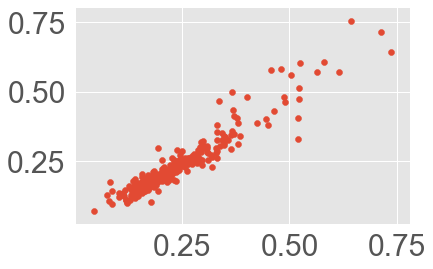

In [65]:
plt.scatter(y_test,pred)

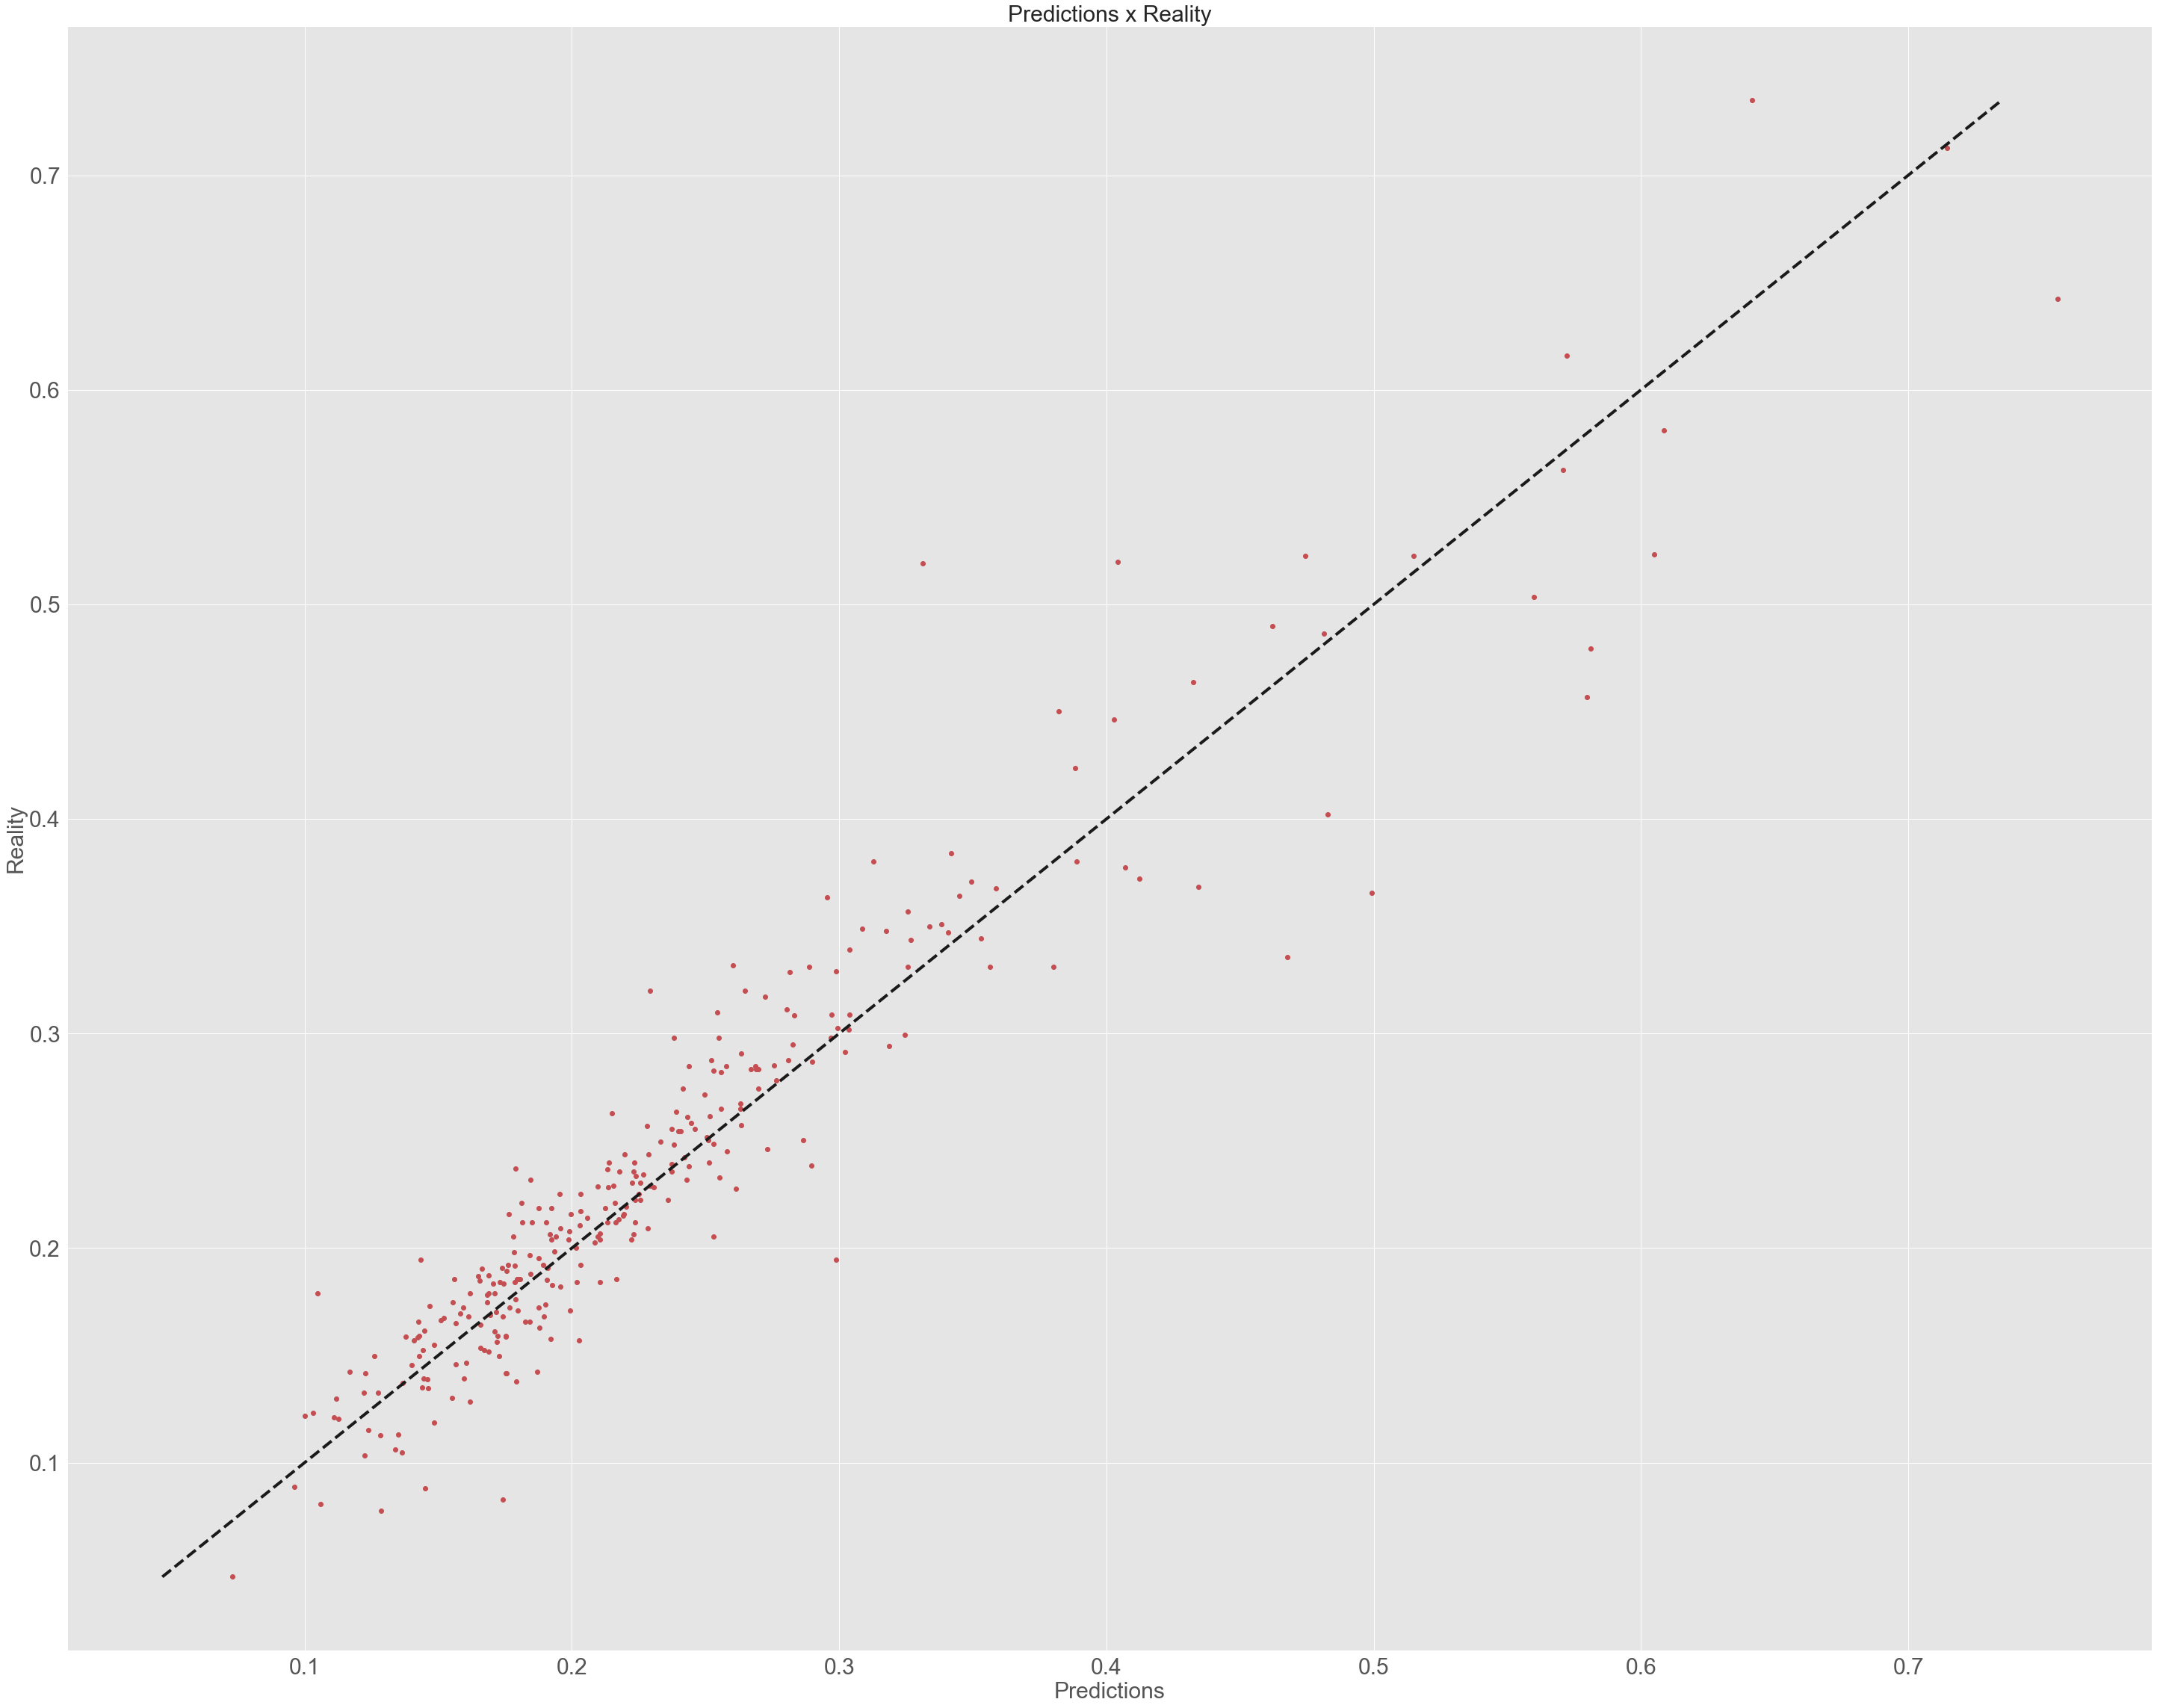

In [66]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(pred, y_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality', fontsize = 30)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
